# Lab - 3 - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Load the Diabetes Dataset from sklearn

In [19]:
from sklearn.datasets import load_diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

### Exploratory Data Analysis

In [3]:
#Description of the dataset
print(load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
#Loading the features of the dataset as dataframe
#First 5 rows of the features
#This shows the after-scaling value of the dataset, so that they are within the specific range, real, -.2 < x < .2
df_X = pd.DataFrame(diabetes_X, columns=load_diabetes().feature_names)
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [21]:
#Loading target variable - quantitative measure of disease progression one year after baseline#
#First 5 rows of the target variable, integer 25 - 346
df_y = pd.DataFrame(diabetes_y, columns=['target'])
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [22]:
#Shape of the dataset
print("Shape of the attributes of the dataset",df_X.shape)
print("Shape of the target variable",df_y.shape)

Shape of the attributes of the dataset (442, 10)
Shape of the target variable (442, 1)


In [23]:
#All the variables of the dataset in the dataframe
df = pd.concat([df_X, df_y], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [24]:
#Descriptive statistics of the dataset
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Visualization
#### Before Splitting the data

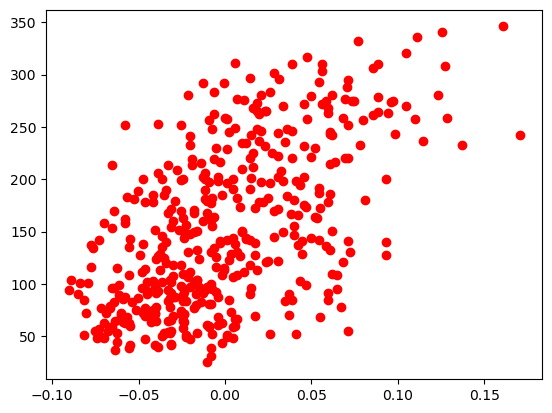

In [9]:
#Scatterplot of BMI and Traget Variable before splitting the data
plt.scatter(df_X.bmi,df_y, color='red')

### Split the dataset for Training and Testing

In [25]:
#Selecting only the BMI feature which is at the index 2
#independent variable
x = diabetes_X[:, np.newaxis, 2]
#Independent variable - Target varible
y = diabetes_y

#print(x)
#print(y)

#Splitting the dataset 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (309, 1)
Shape of X_test: (133, 1)
Shape of y_train: (309,)
Shape of y_test: (133,)


### Creating the model

In [27]:
# Import the linear regression function from sklearn and initialize the model
linear_reg = LinearRegression()
print(linear_reg)
print(type(linear_reg))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


### Training and Prediction of the Model

In [28]:
#To train the model pass the X_train(independent) and y_train(dependent) as arguments
linear_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
#Since the model is trained, pass the test features to get the predictions of the disease progression
y_predicted = linear_reg.predict(X_test)
#y_predicted

### Visualization after training the model

Text(0, 0.5, 'Disease Progression')

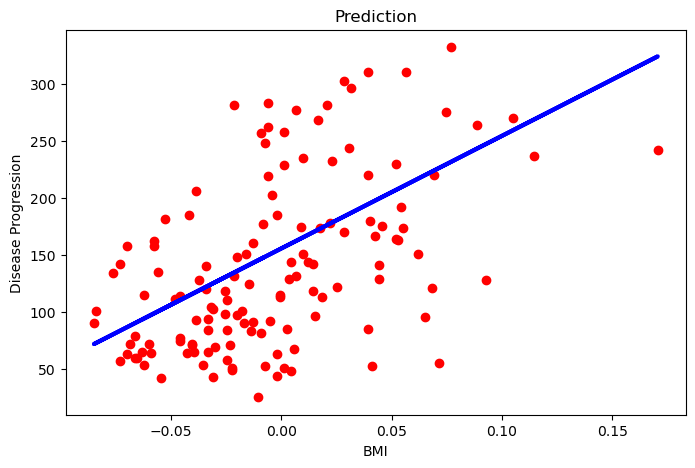

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_predicted, color="blue", linewidth=3)
plt.title("Prediction")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")

### Coefficients and Intercepts

In [31]:
intercept = linear_reg.intercept_
slope = linear_reg.coef_[0]
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')

Intercept: 155.526216341221
Slope: 987.5970341666975


### Evaluation of the Model

In [33]:
#Calculation of evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("The Mean Absolute Error (MAE) is: ", mean_absolute_error(y_test, y_predicted))
print("The Mean Squared Error (MSE) is: ", mean_squared_error(y_test, y_predicted))
print("R-Squared Score is: ", r2_score(y_test, y_predicted))

The Mean Absolute Error (MAE) is:  54.24896234038344
The Mean Squared Error (MSE) is:  4310.847863841382
R-Squared Score is:  0.2231964831846246


#### By evaluting the model, there is a lot of variability in dependent variable which is shown in low R-Squared Score. Hence it is not a good fit for predicting the progression of disease with BMI alone. Consideration of other variables may provide better prediction.